#  Titanic - Part 1
## Submitted by Varun N Naik
#### Performing EDA on the Titanic dataset and gaining insights. Utilising various models to predict to outcomes and determine the most accurate model for this dataset.
#### Various steps involved:
1. Univariate Analysis
2. Bivariate Analysis
3. Missing Value Treatment
4. Outlier Identification
5. Handling Outliers
6. Dummy Variable Creation

In [264]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
%matplotlib inline 
#sns.set_style('darkgrid')

In [265]:
eda=pd.read_csv('TITANIC.csv')

In [266]:
eda.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [267]:
eda.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [268]:
eda.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [269]:
eda.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

**Out of the 891 entries in the table, 657 entries of Cabin are null, _hence Cabin can be neglected._**

**Since entries in Ticket, PassengerId and Name are all unique, different and can't be catagorized, they too can be neglected.**

**Variables:**

**Dependent Variable:** Survived

**Independent Variables/Predictor Variables:**
1. Pclass
2. Sex
3. Age
4. SibSp
5. Parch
6. Fare
7.  Embarked

**Variable Category:**

**Categorical:**
- Sex
- Embarked

**Continuous:**
- Age
- Fare

**Discreet:**
- Survived
- SibSp
- Parch
- Pclass 

### Univariate Analysis

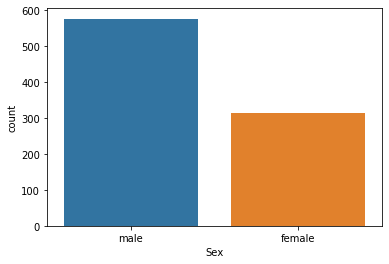

In [270]:
sns.countplot(x='Sex',data=eda)

**There are around 550 men and 300 women. We observe that there are more males than females**

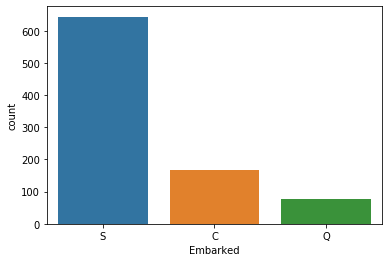

In [271]:
sns.countplot(x='Embarked',data=eda)

**Around 650 passengers embarked from Southampton, around 150 from Cherbourg, and around 100 from Queentown. Majority of the passengers embarked from Southampton**

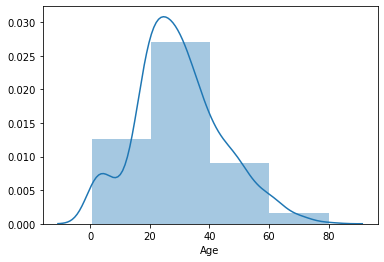

In [272]:
sns.distplot(eda['Age'],bins=4)

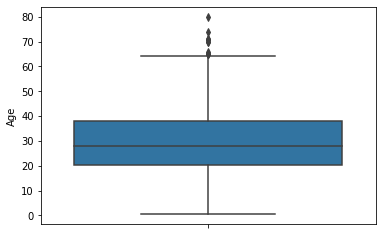

In [273]:
sns.boxplot(y='Age',data=eda)

**We see that the median age is around 30, while the majority is around 20-40 and the maximum age is around 80.  There are outliers present too.**

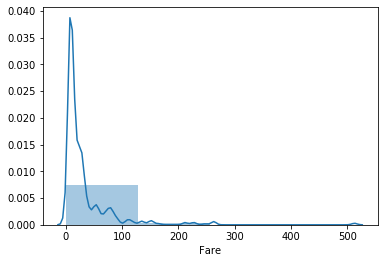

In [274]:
sns.distplot(eda['Fare'],bins=4)

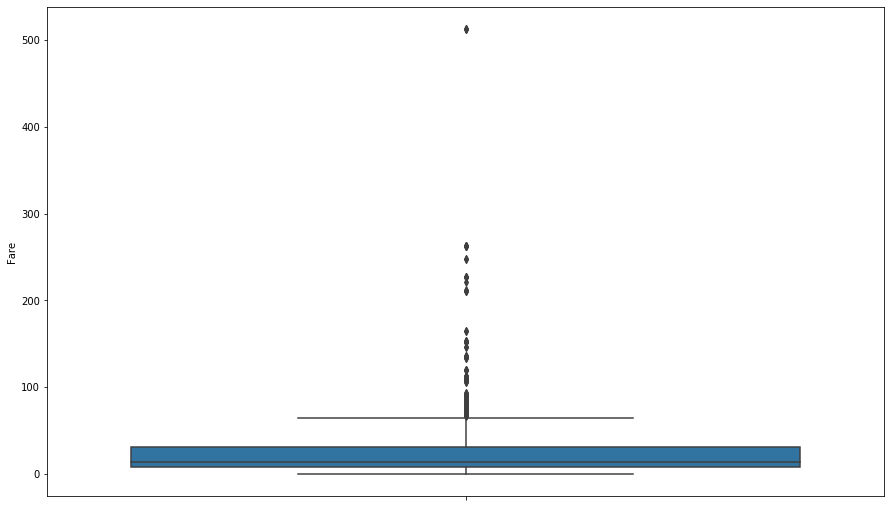

In [275]:
plt.figure(figsize=(15,9))
sns.boxplot(y='Fare',data=eda)

**Majority of the passengers paid below 50$, very few paid large fares, also there are several outliers present.**

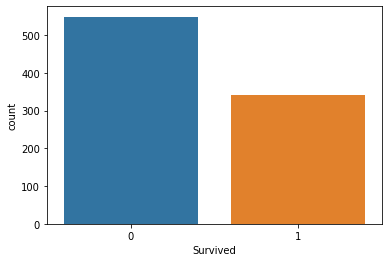

In [276]:
sns.countplot(x='Survived',data=eda)

**While around 350 passengers survived, around 550 passengers did not. Survival rate was low.**

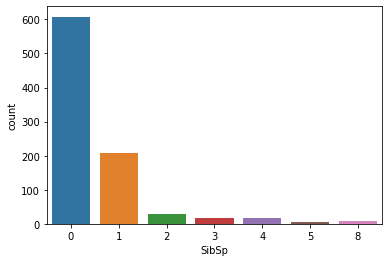

In [277]:
sns.countplot(x='SibSp',data=eda)

**Seeing that there are 200 people had 1 siblings or spouses, there are most likely to be couples. Very few large families were aboard. Around 600 passengers had no siblings or spouses onboard.**

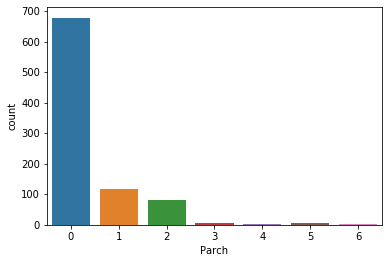

In [278]:
sns.countplot(x='Parch',data=eda)

**From both the graphs above, we see that many passengers were travelling alone. For parch=1,2 they are most likely nuclear families**

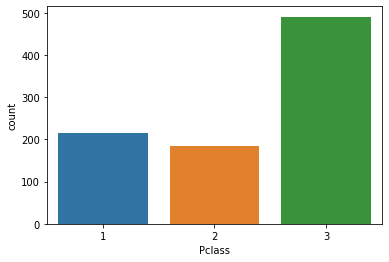

In [279]:
sns.countplot(x='Pclass',data=eda)

**Around 500 passengers were from the 3rd class, while the number of 1st and 2nd class passegers is around 200.**

 ### Bivariate Analysis

Text(0, 0.5, 'Fare')

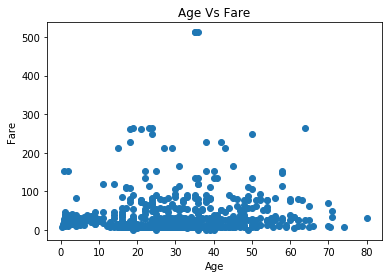

In [280]:
plt.scatter(eda['Age'],eda['Fare'])
plt.title('Age Vs Fare')
plt.xlabel('Age')
plt.ylabel('Fare')

**There are all age groups in the lower fares.
As the fares increase, there are less younger children and elderly.**

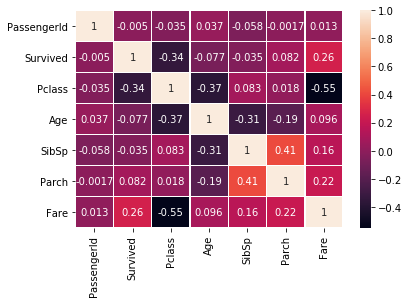

In [281]:
sns.heatmap(eda.corr(),annot=True,linewidth=0.5)

In [282]:
counts=eda.groupby(['Survived','Sex'],axis=0)
counts.size()

Survived  Sex   
0         female     81
          male      468
1         female    233
          male      109
dtype: int64

Text(0.5, 1.0, 'Sex: Survival')

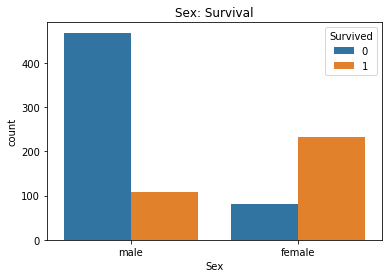

In [283]:
sns.countplot(x ="Sex", hue ="Survived", data =eda) 
plt.title('Sex: Survival')

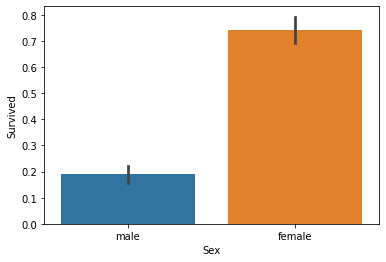

In [284]:
sns.barplot(x ="Sex",y="Survived", data =eda)

**Gender is an important factor for survival. Women had a higher chance of survival,with 74% survival rate. Men had only 19% survival rate.**

***Hence Sex is an important Feature.***

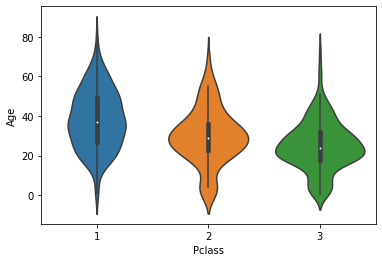

In [285]:
sns.violinplot(x='Pclass',y='Age',data=eda)

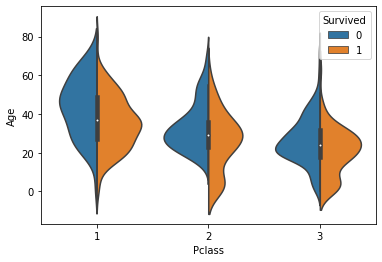

In [286]:
sns.violinplot(x='Pclass',y='Age',data=eda,hue='Survived',split=True)

**There were more children who,belonged to Pclass 2 & 3. But we see that these children had good survival rate, so we can say that age was given higher priority than Pclass for children. Survival of children is good regardless of Pclass.**

**In contrast to this, there are more adult passengers in 3rd class than 1st, but survival rate of the 1st class is higher. So we can say that for adults, age was given lower priority than Pclass.**

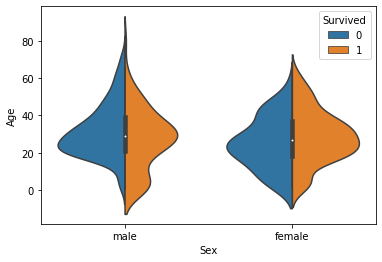

In [287]:
sns.violinplot(x='Sex',y='Age',data=eda,hue='Survived',split=True)

**For males, as the age increased less of them survived. Survival of women is higher regardless of age.
Children of ages around 10 had good chance of survival, especially male. As we have seen before survival of children is good regardless of Pclass.**

***Hence Age is an important Feature.***

Text(0.5, 1.0, 'Pclass:Survived')

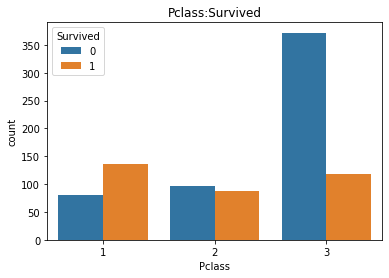

In [288]:
sns.countplot('Pclass', hue='Survived', data=eda)
plt.title('Pclass:Survived')

**Survival rate of 1st class is higher than any other class.
Passengers of the 3rs class had very low survival rate, even though they were the largest in number.
It's likely that people in the 1st class were given higher preference during evacuation/rescue.**

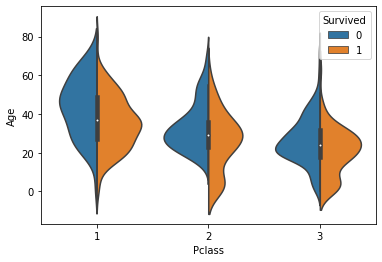

In [289]:
sns.violinplot('Pclass','Age',hue='Survived',data=eda,split=True)

**Children of age around 10 had good chance of survival, regardless of class.
Majority of the children were from Pclass 2 or 3.**

**Regardless of age, we see that more passengers of 1st class survived compared to the other two classes.**

In [290]:
pd.crosstab([eda.Sex], [eda.Pclass,eda.Survived], margins=True)

Pclass     1        2        3       All
Survived   0    1   0   1    0    1     
Sex                                     
female     3   91   6  70   72   72  314
male      77   45  91  17  300   47  577
All       80  136  97  87  372  119  891

**Females of 1st and 2nd class had very high survival rate, whereas women of 3rd class had 50% chance of survival.**

**Men of 2nd and 3rd class had very low survival rate.**

***Hence Pclass is an important feature.***

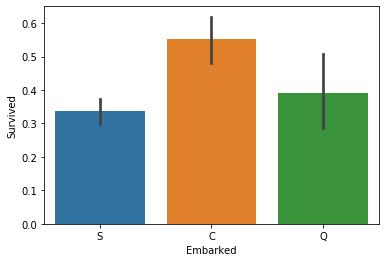

In [291]:
sns.barplot('Embarked','Survived', data=eda)

**Passengers embarked from S had the lowest survival rate, whereas those who embarked from C had the highest survival rate.**

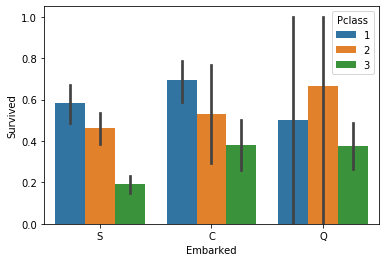

In [292]:
sns.barplot('Embarked','Survived',hue='Pclass', data=eda)

**Number of passengers embarked from S is the highest.**
**Passengers from S belonging to Pclass=3 had lower survival rate than those in Pclass=2 or 1**

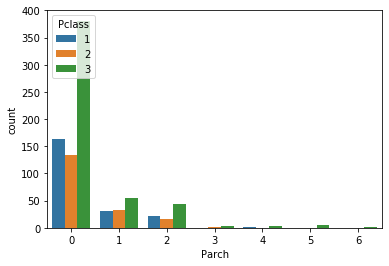

In [293]:
sns.countplot(x='Parch',hue='Pclass',data=eda)

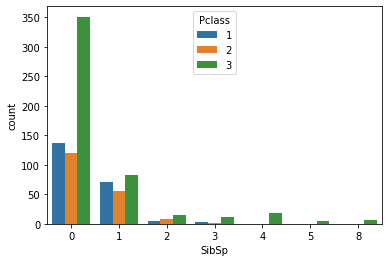

In [294]:
sns.countplot(x='SibSp',hue='Pclass',data=eda)

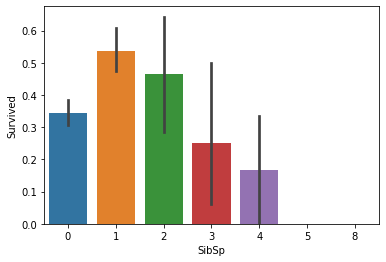

In [295]:
sns.barplot('SibSp','Survived', data=eda)

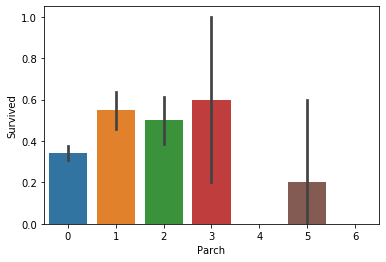

In [296]:
sns.barplot('Parch','Survived', data=eda)

**We see that those who were alone i.e. no children, spouse onboard had lower survival rate. This could also be due to the fact that most alone persons were in 3rd class.**

**Those who had 5 or 6 children or siblings had very low survival rate. Whereas those who had 1-3 children or siblings had higher survival rate compared to very large families or single persons.This could also be due to the fact that most large families were in 3rd class,probably to save on the cost**

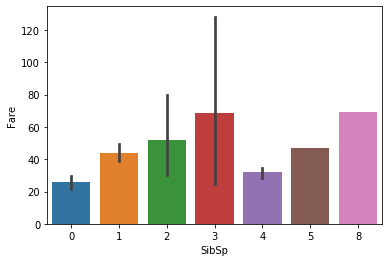

In [297]:
sns.barplot(x='SibSp',y='Fare',data=eda)

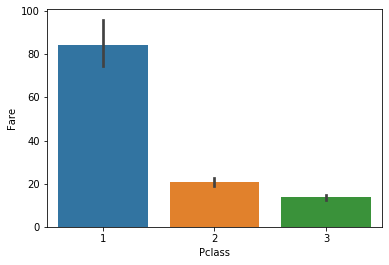

In [298]:
sns.barplot(x='Pclass',y='Fare',data=eda)

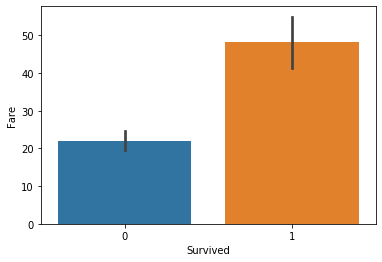

In [299]:
sns.barplot(x='Survived',y='Fare',data=eda)

**Passengers who paid more fare were likely to be in the 1st class had more preference for Evacuation and hence had higher survival rate.** 

## Missing Values Treatment

In [300]:
eda.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [301]:
eda.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


**Cabin has 77% null values, hence it can be dropped.**

In [302]:
x=eda['Embarked'].mode()
print(x[0])
type(x)

S


pandas.core.series.Series

In [303]:
eda['Embarked'].fillna(x[0],inplace=True)

In [304]:
eda.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64

**Embarked null values have been replaced by S which is the mode.**

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000022B64727E08>]],
      dtype=object)

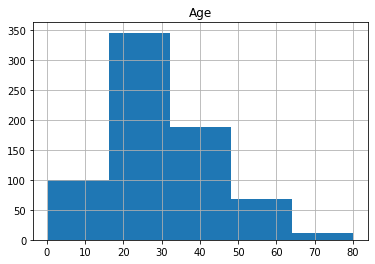

In [305]:
eda.hist(column=['Age'],bins=5)

**The distribution is normal distribution, hence we use mean value.**

In [306]:
eda.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64

In [307]:
eda['Age'].fillna(value=eda['Age'].mean(),inplace=True)

In [308]:
eda.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64

**The null values of Age are replaced with the mean age.**

## Outliers

In [309]:
eda['Age'].describe()

count    891.000000
mean      29.699118
std       13.002015
min        0.420000
25%       22.000000
50%       29.699118
75%       35.000000
max       80.000000
Name: Age, dtype: float64

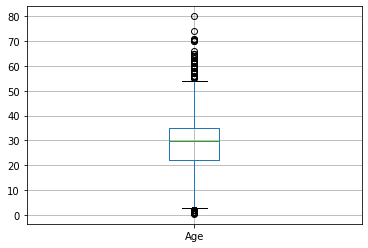

In [310]:
eda.boxplot(column=['Age'])

**We see that there are many outliers in Age. These are natural outliers**

In [311]:
#IQR = Q3-Q1
IQR_age=eda['Age'].quantile(0.75)-eda['Age'].quantile(0.25)
print(IQR_age)

13.0


In [312]:
Upper_OutlierLimit_age=eda['Age'].quantile(0.75)+1.5*IQR_age
Lower_OutlierLimit_age=eda['Age'].quantile(0.25)-1.5*IQR_age
print(Upper_OutlierLimit_age)
print(Lower_OutlierLimit_age)

54.5
2.5


In [313]:
OutlierValues_age=eda[(eda['Age']>=Upper_OutlierLimit_age)|(eda['Age']<=Lower_OutlierLimit_age)]
OutlierValues_age

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.00,3,1,349909,21.0750,NaN,S
11,12,1,1,"Bonnell, Miss. Elizabeth",female,58.00,0,0,113783,26.5500,C103,S
15,16,1,2,"Hewlett, Mrs. (Mary D Kingcome)",female,55.00,0,0,248706,16.0000,NaN,S
16,17,0,3,"Rice, Master. Eugene",male,2.00,4,1,382652,29.1250,NaN,Q
33,34,0,2,"Wheadon, Mr. Edward H",male,66.00,0,0,C.A. 24579,10.5000,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
827,828,1,2,"Mallet, Master. Andre",male,1.00,0,2,S.C./PARIS 2079,37.0042,NaN,C
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.00,0,0,113572,80.0000,B28,S
831,832,1,2,"Richards, Master. George Sibley",male,0.83,1,1,29106,18.7500,NaN,S
851,852,0,3,"Svensson, Mr. Johan",male,74.00,0,0,347060,7.7750,NaN,S


**We see that there are 66 outliers in Age column.**

In [314]:
eda['Fare'].describe()

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64

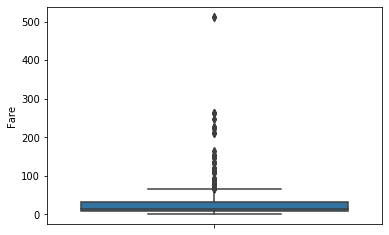

In [315]:
sns.boxplot(y=eda.Fare,data=eda)

In [316]:
#IQR = Q3-Q1
IQR_fare=eda['Fare'].quantile(0.75)-eda['Fare'].quantile(0.25)
print(IQR_fare)

23.0896


In [317]:
Upper_OutlierLimit_fare=eda['Fare'].quantile(0.75)+1.5*IQR_fare
Lower_OutlierLimit_fare=eda['Fare'].quantile(0.25)-1.5*IQR_fare
print(Upper_OutlierLimit_fare)
print(Lower_OutlierLimit_fare)

65.6344
-26.724


In [318]:
OutlierValues_fare=eda[(eda['Fare']>=Upper_OutlierLimit_fare)|(eda['Fare']<=Lower_OutlierLimit_fare)]
OutlierValues_fare

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,C85,C
27,28,0,1,"Fortune, Mr. Charles Alexander",male,19.000000,3,2,19950,263.0000,C23 C25 C27,S
31,32,1,1,"Spencer, Mrs. William Augustus (Marie Eugenie)",female,29.699118,1,0,PC 17569,146.5208,B78,C
34,35,0,1,"Meyer, Mr. Edgar Joseph",male,28.000000,1,0,PC 17604,82.1708,NaN,C
52,53,1,1,"Harper, Mrs. Henry Sleeper (Myna Haxtun)",female,49.000000,1,0,PC 17572,76.7292,D33,C
...,...,...,...,...,...,...,...,...,...,...,...,...
846,847,0,3,"Sage, Mr. Douglas Bullen",male,29.699118,8,2,CA. 2343,69.5500,NaN,S
849,850,1,1,"Goldenberg, Mrs. Samuel L (Edwiga Grabowska)",female,29.699118,1,0,17453,89.1042,C92,C
856,857,1,1,"Wick, Mrs. George Dennick (Mary Hitchcock)",female,45.000000,1,1,36928,164.8667,NaN,S
863,864,0,3,"Sage, Miss. Dorothy Edith ""Dolly""",female,29.699118,8,2,CA. 2343,69.5500,NaN,S


**We see that there are 116 outliers for Fare.**

In [319]:
eda['Parch'].describe()

count    891.000000
mean       0.381594
std        0.806057
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max        6.000000
Name: Parch, dtype: float64

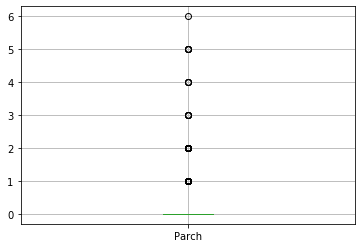

In [320]:
eda.boxplot(column=['Parch'])

**Values out of range of 5th and 95th percentile can be considered as outliers.**

In [321]:
print(eda['Parch'].quantile(0.05))
print(eda['Parch'].quantile(0.95))

0.0
2.0


In [322]:
OutlierValues_parch=eda[(eda['Parch']>=2)]
OutlierValues_parch

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.000000,0,2,347742,11.1333,NaN,S
13,14,0,3,"Andersson, Mr. Anders Johan",male,39.000000,1,5,347082,31.2750,NaN,S
25,26,1,3,"Asplund, Mrs. Carl Oscar (Selma Augusta Emilia...",female,38.000000,1,5,347077,31.3875,NaN,S
27,28,0,1,"Fortune, Mr. Charles Alexander",male,19.000000,3,2,19950,263.0000,C23 C25 C27,S
43,44,1,2,"Laroche, Miss. Simonne Marie Anne Andree",female,3.000000,1,2,SC/Paris 2123,41.5792,NaN,C
...,...,...,...,...,...,...,...,...,...,...,...,...
850,851,0,3,"Andersson, Master. Sigvard Harald Elias",male,4.000000,4,2,347082,31.2750,NaN,S
858,859,1,3,"Baclini, Mrs. Solomon (Latifa Qurban)",female,24.000000,0,3,2666,19.2583,NaN,C
863,864,0,3,"Sage, Miss. Dorothy Edith ""Dolly""",female,29.699118,8,2,CA. 2343,69.5500,NaN,S
885,886,0,3,"Rice, Mrs. William (Margaret Norton)",female,39.000000,0,5,382652,29.1250,NaN,Q


**There are 95 outliers in Parch column.**

In [323]:
eda['SibSp'].describe()

count    891.000000
mean       0.523008
std        1.102743
min        0.000000
25%        0.000000
50%        0.000000
75%        1.000000
max        8.000000
Name: SibSp, dtype: float64

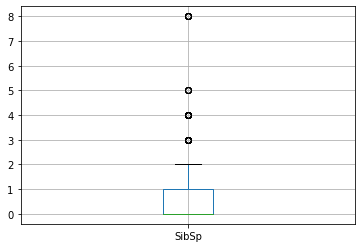

In [324]:
eda.boxplot(column=['SibSp'])

**Values out of range of 5th and 95th percentile can be considered as outliers.**

In [325]:
print(eda['SibSp'].quantile(0.05))
print(eda['SibSp'].quantile(0.95))

0.0
3.0


In [326]:
OutlierValues_sibsp=eda[(eda['SibSp']>=3)]
OutlierValues_sibsp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 46 entries, 7 to 863
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  46 non-null     int64  
 1   Survived     46 non-null     int64  
 2   Pclass       46 non-null     int64  
 3   Name         46 non-null     object 
 4   Sex          46 non-null     object 
 5   Age          46 non-null     float64
 6   SibSp        46 non-null     int64  
 7   Parch        46 non-null     int64  
 8   Ticket       46 non-null     object 
 9   Fare         46 non-null     float64
 10  Cabin        3 non-null      object 
 11  Embarked     46 non-null     object 
dtypes: float64(2), int64(5), object(5)
memory usage: 4.7+ KB


**There are 46 outliers in SibSp column.**

### Handle Outliers

**Using capping method**

**Age**

In [327]:
print(eda['Age'].quantile(0.05))
print(eda['Age'].quantile(0.95))

6.0
54.0


In [328]:
eda["Age"] = np.where(eda["Age"] <6.0, 6.0,eda['Age'])
eda["Age"] = np.where(eda["Age"] >54.0, 54.0,eda['Age'])

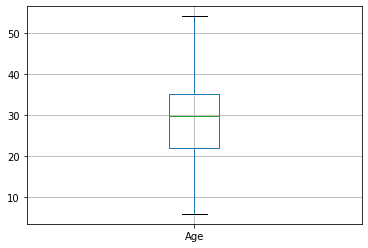

In [329]:
eda.boxplot(column=['Age'])

**Fare**

In [330]:
print(eda['Fare'].quantile(0.85))

56.4958


In [331]:
eda["Fare"] = np.where(eda["Fare"] >56.4958, 56.4958,eda['Fare'])

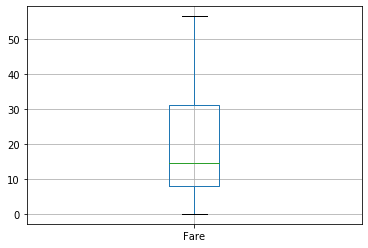

In [332]:
eda.boxplot(column='Fare')

In [333]:
eda["Fare"].describe()

count    891.000000
mean      22.804680
std       18.056822
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max       56.495800
Name: Fare, dtype: float64

**Parch**

In [334]:
print(eda['Parch'].quantile(0.85))

1.0


In [335]:
eda["Parch"] = np.where(eda["Parch"] >1.0, 1.0,eda['Parch'])

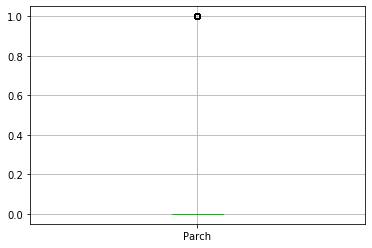

In [336]:
eda.boxplot(column='Parch')

In [337]:
eda["Parch"].describe()

count    891.000000
mean       0.239057
std        0.426747
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max        1.000000
Name: Parch, dtype: float64

**SibSp**

In [338]:
print(eda['SibSp'].quantile(0.94))

2.0


In [339]:
eda["SibSp"] = np.where(eda["SibSp"] >2.0, 2.0,eda['SibSp'])

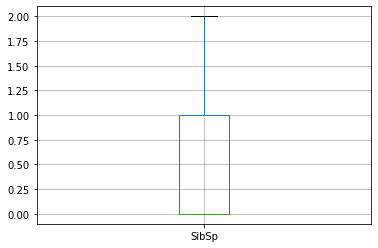

In [340]:
eda.boxplot(column='SibSp')

In [341]:
eda["SibSp"].describe()

count    891.000000
mean       0.400673
std        0.637727
min        0.000000
25%        0.000000
50%        0.000000
75%        1.000000
max        2.000000
Name: SibSp, dtype: float64

## Dummy Variable Creation

**Converting Embarked and Sex into dummy variables**

In [342]:
obj=eda.dtypes==np.object
print(obj)

PassengerId    False
Survived       False
Pclass         False
Name            True
Sex             True
Age            False
SibSp          False
Parch          False
Ticket          True
Fare           False
Cabin           True
Embarked        True
dtype: bool


In [343]:
del eda['Name']

In [344]:
del eda['PassengerId']
del eda['Ticket']
del eda['Cabin']

In [345]:
eda.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       891 non-null    float64
 4   SibSp     891 non-null    float64
 5   Parch     891 non-null    float64
 6   Fare      891 non-null    float64
 7   Embarked  891 non-null    object 
dtypes: float64(4), int64(2), object(2)
memory usage: 55.8+ KB


In [346]:
obj=eda.dtypes==np.object
print(obj)

Survived    False
Pclass      False
Sex          True
Age         False
SibSp       False
Parch       False
Fare        False
Embarked     True
dtype: bool


In [347]:
edaNew=pd.get_dummies(eda,drop_first=True)

In [348]:
edaNew.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Survived    891 non-null    int64  
 1   Pclass      891 non-null    int64  
 2   Age         891 non-null    float64
 3   SibSp       891 non-null    float64
 4   Parch       891 non-null    float64
 5   Fare        891 non-null    float64
 6   Sex_male    891 non-null    uint8  
 7   Embarked_Q  891 non-null    uint8  
 8   Embarked_S  891 non-null    uint8  
dtypes: float64(4), int64(2), uint8(3)
memory usage: 44.5 KB


In [349]:
edaNew.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S
0,0,3,22.0,1.0,0.0,7.2500,1,0,1
1,1,1,38.0,1.0,0.0,56.4958,0,0,0
2,1,3,26.0,0.0,0.0,7.9250,0,0,1
3,1,1,35.0,1.0,0.0,53.1000,0,0,1
4,0,3,35.0,0.0,0.0,8.0500,1,0,1


In [350]:
#edaNew.to_csv('EDA Titanic.csv')